# Project 03: Gibbs Sampling (Random Algorithm)

In [2]:
import bamnostic as bs
import seqlogo
from pprint import pprint
import numpy as np

#import function for building sequence motif & idenfitying seqs matching to motif
from project03 import GibbsMotifFinder, run_parallel
import motif_ops
from utils import utils
from sequence_database import sequence_box

print("Great, everything is up to date")

Great, everything is up to date


# Our code
Check notes in each cell to see if it's what you're trying to do

In [ ]:
#create the seqs array, just need to do 1 time and it will take a while. For Vic it took ~3-5 minutes.
bam_path = "data/SRR9090854.subsampled_5pct.bam"

bam = bs.AlignmentFile(bam_path)
next(bam)

input()

seqs = [print(read.reference_end) for read in bs.AlignmentFile(bam_path)]


22	99	1	10059	0	37M	=	10253	231	CCTAACCCTAACCCTAACCCTAACCCTATCCAGATCG	AAAAAEEEEEEEEEEEEEEEEAEE/AEE/EE//E/EA	NH:C:1	NM:C:5


In [13]:
#Check that seqs has initialized (and view some data)
pprint(seqs[0:10])

['CCTAACCCTAACCCTAACCCTAACCCTATCCAGATCG',
 'ACCCTAACCCTAACCCAAACCCTAACCCTAACAGATC',
 'CCCTAACCCTAACCCTAACCCTAACCCTAACCCTAAC',
 'CTAACCCTAACCCTAACCCTAACCCTAACCCTAAC',
 'CTATCCCTAACCCTAACCCTAACCCTAACCCTAACC',
 'CGATATCCTAACCCTAACCCTAACCCTAACCCTAACC',
 'ATCTACCCTAACCCTAACCCTAACCCTAACCCTAAC',
 'TACCCCTAACCCTAACCCTAACCCTAACCCTAACCCT',
 'CCTAACCCTAACCCTAACCCTAACCCTCGCGGTACCC',
 'CCTAACCCTAACCCTCGCGGTACCCTCAGCCGGCCCG']


In [14]:
#check that bamnostic sequences are identical to seq_box
n_rows=3083497
k=6

np_seqs, indptr = utils.io_monster(mode="")
motifs, midx = utils.fast_init(np_seqs, n_rows, indptr, k)
seq_box = sequence_box(indptr, np_seqs, midx, motifs, k)

for i in range(len(seq_box)):
    decoded_sequence = utils.decode_sequence(seq_box[i])
    if decoded_sequence != seqs[i]:
       raise ValueError("sequence mismatch")
print("no mismatch")


processed_data.npz exists, reading from path
data ready :)
no mismatch


In [15]:
#demonstrate the encoding/decoding process
x = ["GATTACA"]
print(x[0])
x = np.frombuffer("".join(x).encode(), dtype=np.uint8)
print(x)
xx = utils.encode_sequences(x, utils.init_base_encoding_map())
print(xx)
yy = utils.fast_complement(xx)
print(yy)
print(utils.decode_sequence(yy))

GATTACA
[71 65 84 84 65 67 65]
[2 0 3 3 0 1 0]
[3 2 3 0 0 3 1]
TGTAATC


In [16]:
#check that pfms are equal
motifs = seq_box.get_str_list_format_motifs()
pfm_original = motif_ops.build_pfm(motifs, length=k)
pfm_seq_box = seq_box.get_pfm()
print(np.array_equal(pfm_original, pfm_seq_box))

True


In [17]:
#check that scoring algorithms are equal
pwm = motif_ops.build_pwm(pfm_seq_box)
str_motifs = motifs[:5]
encoded_motifs = seq_box.motifs[:5]
x = [motif_ops.score_kmer(kmer, pwm) for kmer in str_motifs]
y = utils.fast_score(encoded_motifs, pwm)

print("string-pythonic method")
pprint(x)

print("fast method")
pprint(y)

string-pythonic method
[np.float64(-0.0732546658051283),
 np.float64(-0.07407316985670565),
 np.float64(-0.030915986604802548),
 np.float64(-0.0391292958440117),
 np.float64(-0.06602092347732214)]
fast method
array([-0.07325467, -0.07407317, -0.03091599, -0.0391293 , -0.06602092])


In [18]:
results = GibbsMotifFinder(speed="pythonic", toprint=True)

processed_data.npz exists, reading from path
data ready :)
array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

array([[849600, 850813, 853023, 853774, 851361, 849386],
       [693153, 691334, 688930, 684257, 684631, 684968],
       [686500, 685762, 685076, 687901, 691307, 694671],
       [854244, 855588, 856468, 857565, 856198, 854472]], dtype=int32)

After 15 iterations, final motif list: ['AACCCT', 'CTAACC', 'CCCTAA', 'ACCCTA', 'AACCCT', 'CTAACC', 'ACCCTA', 'TACCCC', 'AACCCT', 'CTAACC', 'AACTGT', 'AGGACA', 'AAGCCT', 'AAAAGC', 'ACTGCA', 'CTTAGA', 'CTCTTG', 'GGGCTC', 'ACTGCA', 'TGGTGG']


In [19]:
#runs a lot of times to check convergence - you will get a "consensus" sequence by running this. 
#if you want the pfm for seqlogo you do not need to do this

#returns the pfm
results = run_parallel(speed="fast", max_iter=1000, subsample_size=1e10, toprint=True)

---
# Driver Program
Don't change any of the code here. If you have completed the project by following the coding by contract, the following code should work.

processed_data.npz exists, reading from path
data ready :)
array([[849303, 849727, 853012, 852658, 853207, 853781, 854465, 853091,
        851738, 848482],
       [696135, 696036, 691811, 689721, 689159, 684485, 681196, 681650,
        682971, 684868],
       [685054, 683048, 681997, 684685, 684396, 688159, 690403, 692632,
        694629, 696237],
       [853005, 854686, 856677, 856433, 856735, 857072, 857433, 856124,
        854159, 853910]], dtype=int32)
beginning fast iteration
Iteration 1023, subsample 0
array([[849422, 849789, 853104, 852726, 853268, 853864, 854504, 853163,
        851810, 848568],
       [696019, 695956, 691712, 689662, 689076, 684418, 681091, 681546,
        682923, 684748],
       [684899, 682948, 681891, 684610, 684321, 688094, 690357, 692562,
        694510, 696132],
       [853157, 854804, 856790, 856499, 856832, 857121, 857545, 856226,
        854254, 854049]], dtype=int32)

algorithm did not converge :(((

After 1024 iterations, final motif list: ['CCCTAAC

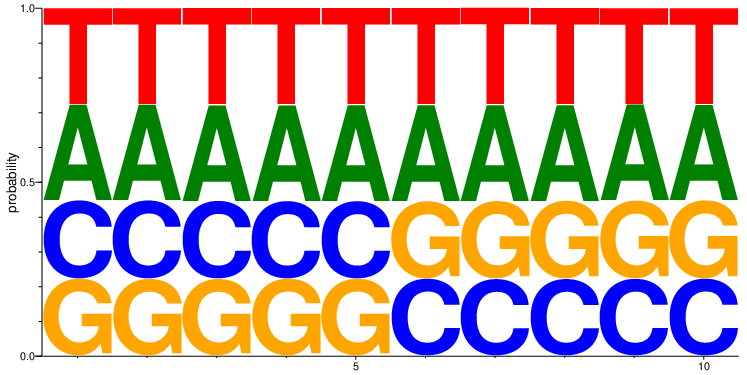

In [20]:
#Marcus' code:
#If everything is correct, we should not need to edit this

# Run the gibbs sampler:
promoter_pfm = GibbsMotifFinder(seqs,10)

# Plot the final pfm that is generated:
ppm = seqlogo.CompletePm(pfm=promoter_pfm)
seqlogo.seqlogo(ppm, ic_scale=False, format="png", size="large", filename="test.png")